In [64]:
import numpy as np
import matplotlib.pyplot as plt
import fabio
from pygix.grazing_geometry import GrazingGeometry
from pyFAI.detectors import Pilatus1M

In [65]:
p1m = Pilatus1M()

In [66]:
gi = GrazingGeometry(
    detector=p1m,
)

In [80]:
gi.set_dist(0.2)
gi.set_energy(12.4)
gi.set_poni1(0.1)
gi.set_poni2(0.1)
gi.set_incident_angle(5)
gi.set_tilt_angle(00)

In [81]:
shape = p1m.shape

In [82]:
data = np.random.random(shape)

In [83]:
d1, d2 = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))

In [84]:
qx, qy, qz = gi.calc_q_xyz(
    d1=d1,
    d2=d2,
)

qz, qxy = gi.calc_q(d1,d2)


SCALING_FACTOR = 100
qx, qy, qz = qx*SCALING_FACTOR, qy*SCALING_FACTOR, qz*SCALING_FACTOR
qxy = qxy * SCALING_FACTOR

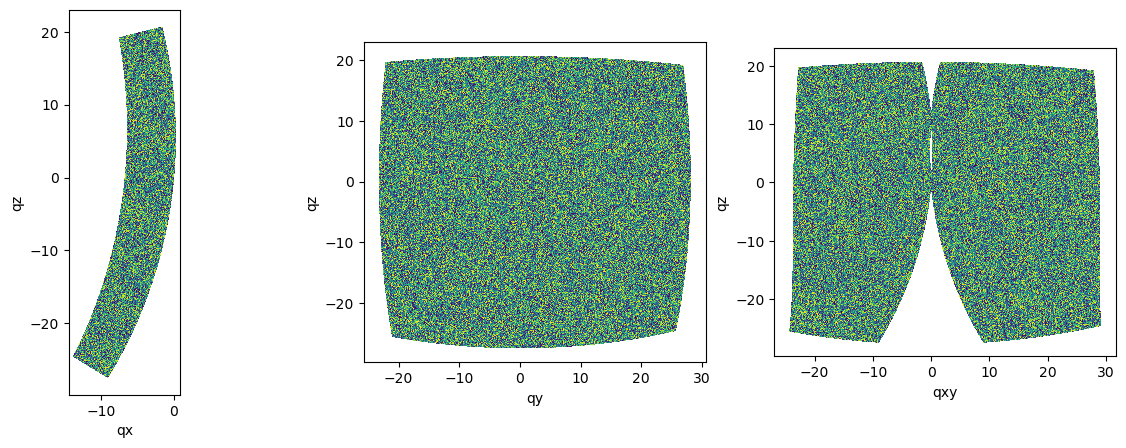

In [85]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
axes[0].scatter(qx, qz, c=data, s=0.6, edgecolors="None", marker=",")
# axes[0].pcolormesh(qx, qz, data)
axes[0].set_xlabel("qx")
axes[0].set_ylabel("qz")
axes[0].set_aspect('equal')
axes[1].scatter(qy, qz, c=data, s=0.6, edgecolors="None", marker=",")
# axes[1].pcolormesh(qy, qz, data)
axes[1].set_xlabel("qy")
axes[1].set_ylabel("qz")
axes[1].set_aspect('equal')
axes[2].scatter(qxy, qz, c=data, s=0.6, edgecolors="None", marker=",")
# axes[2].pcolormesh(qxy, qz, data)
axes[2].set_xlabel("qxy")
axes[2].set_ylabel("qz")
axes[2].set_aspect('equal')
plt.show()

In [79]:
# fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
# axes[0].scatter(qxy, qz, c=data, s=0.6, edgecolors="None", marker=".")
# axes[1].scatter(qxy, qz, c=data, s=0.6, edgecolors="None", marker=",")
# axes[2].scatter(qxy, qz, c=data, s=0.6, edgecolors="None", marker="*")

# plt.show()

##### Real example

In [2]:
PATH_PONI = r"edf_examples/test_NCD/Cr2O3.poni"
PATH_EDF = r"edf_examples/test_NCD/A1/rayonix_A1_spitch_0.12_000_0000.edf"

In [3]:
gi = GrazingGeometry()
gi.load(PATH_PONI)

Detector Detector	 Spline= None	 PixelSize= 8.854e-05, 8.854e-05 m
Wavelength= 9.998726e-11 m
SampleDetDist= 2.195615e-01 m	PONI= 2.134776e-01, 6.657482e-03 m	rot1=-0.006725  rot2=-0.002436  rot3=0.000005 rad
DirectBeamDist= 219.567 mm	Center: x=91.868, y=2405.047 pix	Tilt= 0.410° tiltPlanRotation= -19.911° 𝛌= 1.000Å

In [12]:
gi.set_incident_angle(0.12)
gi.set_tilt_angle(0)
gi.set_sample_orientation(3)

In [13]:
data = fabio.open(PATH_EDF).data

In [14]:
shape = data.shape

In [20]:
d2,d1 = np.meshgrid(
                np.linspace(1,shape[1],shape[1]),
                np.linspace(1,shape[0],shape[0]),
            )

In [21]:
qx, qy, qz = gi.calc_q_xyz(d1,d2)
qxy = np.sqrt(qx ** 2 + qy ** 2) * np.sign(qy)
SCALING_FACTOR = 100
qx, qy, qz = qx*SCALING_FACTOR, qy*SCALING_FACTOR, qz*SCALING_FACTOR
qxy = qxy * SCALING_FACTOR

In [28]:
qxy.shape

(2880, 960)

In [29]:
qz.shape

(2880, 960)

In [30]:
data.shape

(2880, 960)

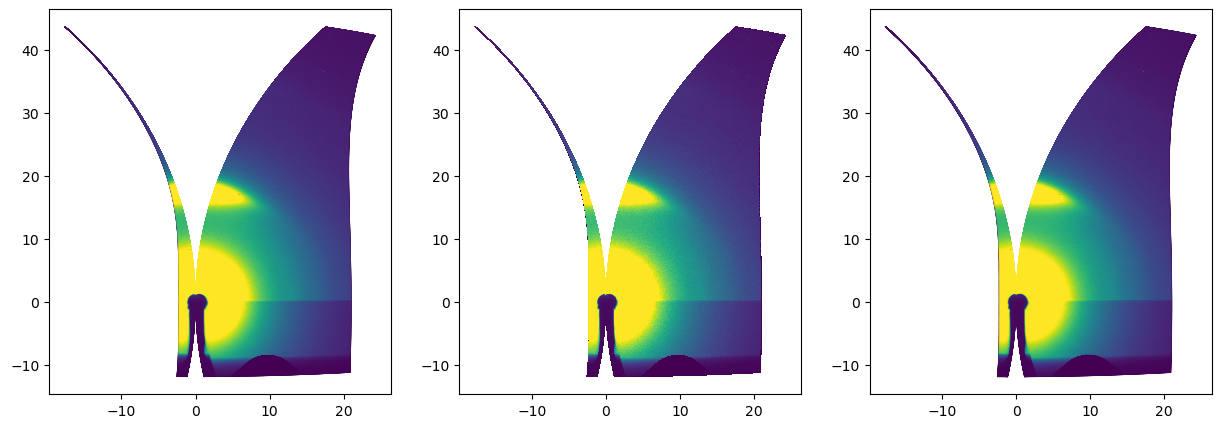

In [27]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
axes[0].scatter(qxy, qz, c=data, s=0.6, edgecolors="None", marker=".", vmin=0, vmax=1000)
axes[1].scatter(qxy, qz, c=data, s=0.6, edgecolors="None", marker=",", vmin=0, vmax=1000)
axes[2].scatter(qxy, qz, c=data, s=0.6, edgecolors="None", marker="*", vmin=0, vmax=1000)

plt.show()